<a href="https://colab.research.google.com/github/E2025-Arda/Deep-Learning/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

In [52]:
#df1=pd.read_csv("fake_reg.csv")

In [53]:
#df1.head()

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/22-Deep Learning/fake_reg.csv')

In [56]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [57]:
df.shape

(1000, 3)

In [58]:
df.isnull().sum().any()

False

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


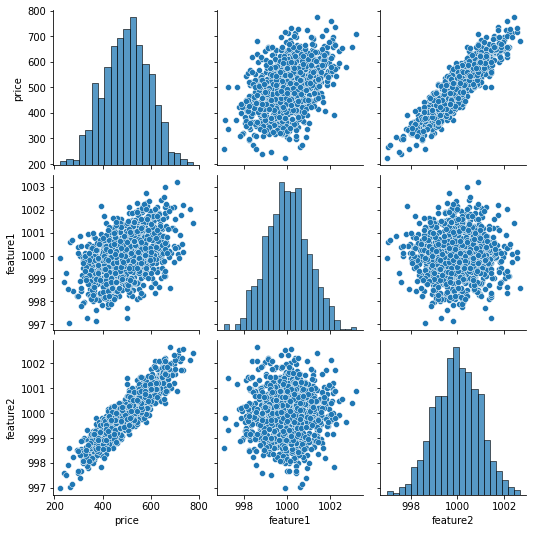

In [60]:
sns.pairplot(df)

In [61]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df[["feature1", "feature2"]].values

In [64]:
y=df["price"].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
X_train.shape

(700, 2)

In [67]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [68]:
#scaling data

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler2 = MinMaxScaler()

In [71]:
scaler2.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [72]:
X_train = scaler2.transform(X_train)

In [73]:
X_test = scaler2.transform(X_test)

In [74]:
X_train.min()

0.0

In [75]:
X_train.max()

1.0

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

In [76]:
import tensorflow as tf

In [77]:
tf.__version__

'2.4.0'

In [78]:
from tensorflow.keras.models import Sequential

In [79]:
from tensorflow.keras.layers import Dense, Activation

In [80]:
model6 = Sequential()
model6.add(Dense(4, input_dim=2, activation="relu"))           #input_dim = 2  or input_dim = X_train.shape[0]
model6.add(Dense(4, activation="relu"))
model6.add(Dense(2, activation="relu"))
model6.add(Dense(1))
model6.compile(optimizer="rmsprop", loss="mse")

In [81]:
model6.fit(X_train, y_train, batch_size=16, epochs=250)

Epoch 1/250
44/44 [==============================] - 1s 1ms/step - loss: 252377.7264
Epoch 2/250
44/44 [==============================] - 0s 1ms/step - loss: 251952.5382
Epoch 3/250
44/44 [==============================] - 0s 977us/step - loss: 251367.2826
Epoch 4/250
44/44 [==============================] - 0s 985us/step - loss: 252849.9698
Epoch 5/250
44/44 [==============================] - 0s 964us/step - loss: 256320.5507
Epoch 6/250
44/44 [==============================] - 0s 1ms/step - loss: 255072.9937
Epoch 7/250
44/44 [==============================] - 0s 970us/step - loss: 250359.8264
Epoch 8/250
44/44 [==============================] - 0s 1ms/step - loss: 256478.7316
Epoch 9/250
44/44 [==============================] - 0s 1ms/step - loss: 251131.2969
Epoch 10/250
44/44 [==============================] - 0s 1ms/step - loss: 250894.1840
Epoch 11/250
44/44 [==============================] - 0s 2ms/step - loss: 253366.8399
Epoch 12/250
44/44 [==============================] - 0

In [82]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [83]:
loss_df=pd.DataFrame(model6.history.history)

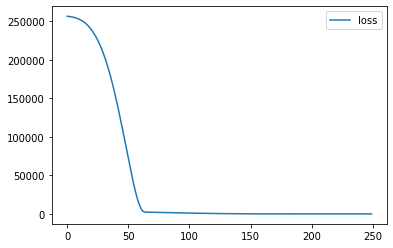

In [84]:
loss_df.plot()

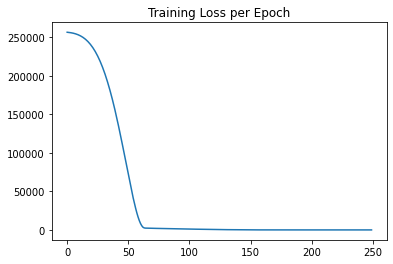

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
loss = model6.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

(0.0, 50.0)

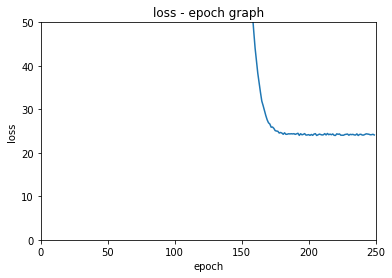

In [86]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,250]) # focusing on the given x values
ax.set_ylim([0,50]) # focusing on the given y values

In [87]:
loss_df.loss.idxmin() 

206

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [89]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [90]:
y_pred = model6.predict(X_test)

In [91]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971016058828077 
 mae: 4.043539863196665 
 mse: 25.48277285720044 
 rmse: 5.048046439683419


In [92]:
y_test.shape

(300,)

In [93]:
y_pred.shape

(300, 1)

In [94]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [95]:
compare.sample(5)

,Actual,Pred
194,361.426405,356.634430
253,484.560105,492.953552
37,550.142462,549.574951
148,564.672072,561.688843
198,497.464727,491.846436


In [96]:
model6.evaluate(X_train,y_train,verbose=0)

25.13029670715332

In [97]:
model6.evaluate(X_test,y_test,verbose=0)

25.48276710510254

In [98]:
import seaborn as sns

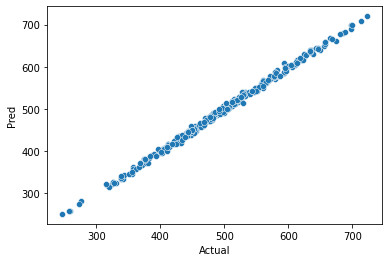

In [99]:
sns.scatterplot(x="Actual", y="Pred",data=compare)

In [100]:
new_data  = [[999,1001]]

In [105]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler

In [107]:
new_data = scaler2.transform(new_data)

In [108]:
new_data

array([[0.30608328, 0.71932348]])

In [ ]:
from tensorflow

In [110]:
model6.save("my_model.h5")

In [ ]:
/content/my_model.h5